In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [3]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 [==============================] - 18s 2us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [6]:
# printing the 10th image

print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
print(X_train[10].shape)

(28, 28)


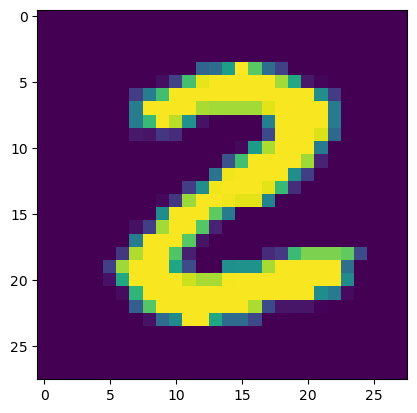

2


In [8]:
# displaying the image

plt.imshow(X_train[25])
plt.show()

# print the corresponding label
print(Y_train[25])

In [9]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [10]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [12]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network

In [15]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

In [16]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2990 - accuracy: 0.9135
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1387 - accuracy: 0.9582
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1014 - accuracy: 0.9690
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0822 - accuracy: 0.9744
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0678 - accuracy: 0.9790
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0581 - accuracy: 0.9818
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0518 - accuracy: 0.9831
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0460 - accuracy: 0.9852
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0398 - accuracy: 0.9865
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.036

Training data accuracy = 98.9%

Accuracy on Test data:

In [19]:
print(X_test.shape)

(10000, 28, 28)


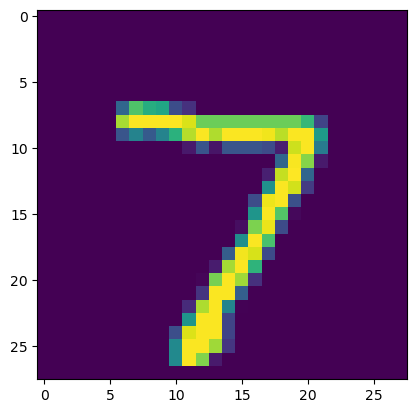

In [20]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [21]:
print(Y_test[0])

7


In [22]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 0s 987us/step


In [23]:
print(Y_pred.shape)

(10000, 10)


In [24]:
print(Y_pred[0])

[3.0716426e-05 2.1404840e-02 6.0680300e-01 9.9006605e-01 2.8053668e-07
 4.2053148e-01 1.1781106e-11 9.9999946e-01 5.5913333e-02 3.7513360e-01]


model.predict() gives the prediction probability of each class for that data point

In [25]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [26]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True labels

Y_pred_labels --> Predicted Labels

Confusin Matrix

In [27]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [28]:
print(conf_mat)

tf.Tensor(
[[ 955    0    4    2    1    9    5    0    3    1]
 [   0 1126    2    0    0    2    2    0    3    0]
 [   0   10  998    7    2    2    1    4    8    0]
 [   0    0    3  979    0   14    0    5    4    5]
 [   0    1    3    0  967    0    3    1    0    7]
 [   1    0    0    8    1  876    2    0    3    1]
 [   0    4    2    1    8   12  928    0    3    0]
 [   1    7   14    1    2    0    0  996    1    6]
 [   2    1    5    6    4    9    1    3  937    6]
 [   2    5    0   10   11    3    1    4    3  970]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

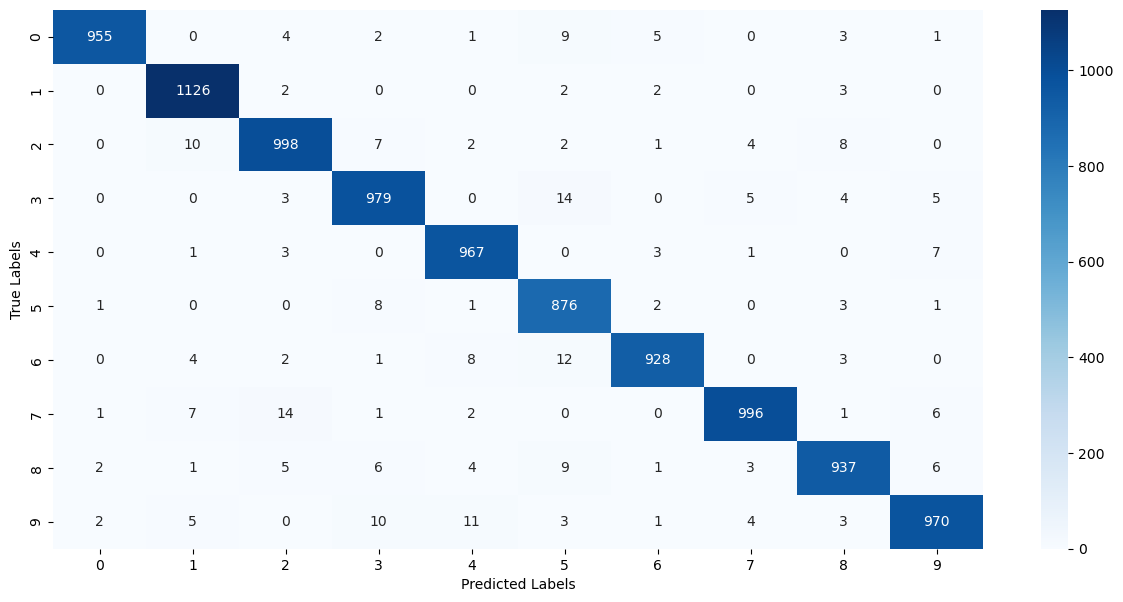

In [29]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [36]:
input_image_path = "C:\\Users\\saiku\\Desktop\\DL projects\\MNIST Digit Classification\\3 image.png"

input_image = cv2.imread(input_image_path)

In [37]:
type(input_image)

numpy.ndarray

In [38]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [45]:
import cv2
import matplotlib.pyplot as plt

In [48]:
image = cv2.imread('input_image')

TypeError: Image data of dtype <U11 cannot be converted to float

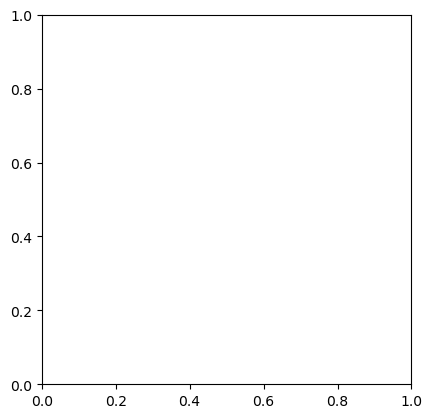

In [50]:
plt.imshow('input_image')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()